Gene expression analysis is a commonly used technique in molecular biology. In this analysis we are looking at the expression levels of multiple genes as determined by a DNA microarray and their roles in predicting cancer types. All of the subjects in the study had one of two types of cancer, ALL (acute lymphoblastic leukemia) or AML (acute myeloid leukemia). The data was used in 1999 by Golub et al. as a proof of concept study.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import sklearn
import numpy as np

## Data Cleaning

In [2]:
train_df = pd.read_csv("/Users/cghiassi5/Downloads/gene-expression/data_set_ALL_AML_train.csv")
test_df = pd.read_csv("/Users/cghiassi5/Downloads/gene-expression/data_set_ALL_AML_independent.csv")
validation_df = pd.read_csv("/Users/cghiassi5/Downloads/gene-expression/actual.csv")
train_df.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


The columns labeled call seem to represent probes used during DNA microarray analysis. These probes don't seem to provide any direct value in analysis and were dropped.

In [3]:
# removing all call columns from data frame
train_columns = [col for col in train_df if "call" not in col]
test_columns = [col for col in test_df if "call" not in col]
train_adjusted = train_df[train_columns]
test_adjusted = test_df[test_columns]
train_adjusted.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In observing the data frames we can see that the genes accession numbers are listed as rows while the expression levels of each patient are listed as columns. This is not an ideal form for analysis as rows typically represent samples so the data frame was transposed.

In [4]:
#transposing data frames
transposed_train = train_adjusted.T
transposed_test = test_adjusted.T
transposed_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [5]:
predictors = pd.concat([transposed_train, transposed_test], axis = 0)
predictors = predictors.drop(['Gene Description', 'Gene Accession Number'])
predictors.columns = transposed_train.iloc[0]

## Exploratory Data Analysis

Below we can see the total proportion of AML to ALL cancer types, we can see  that the data frame has a larger proportion of patients with ALL than AML. We can also see that only slightly over 20 patients have AML so any findings gathered from EDA on the AML set are far from conclusive and should only be used as a guide for possible further investigation.

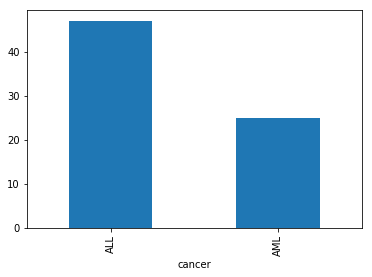

In [6]:
#resetting indices of both predictor and validation data frames so they can be combined
vd = validation_df.reset_index(drop = True)
pr = predictors.reset_index(drop = True)
#combining validation and predictor data frames
combined = pd.concat([pr, vd], axis = 1)
#finding most expressed genes in combined data dataframe
outcomes = combined.groupby('cancer').size()
outcomes.plot(kind = 'bar')

Below we can see the values of the 10 most highly expressed genes in the study, as the data has been scaled these points represent relative values of the expression of these genes. The most expressed genes in the two samples differ and this may indicate the roles of these genes in causing the different cancer types. Genes encoding the RPL37a Ribosomal protein A are highly expressed in both. If compared to a control population this may possibly be used as a general indicator of either of these leukemia types. However genes encoding proteins such as Globin Beta are only more highly expressed in one of the cancer types and more reasearch into their function may lead to insight with regards to the mechanisms of the different leukemias and what disinguishes them from one another.

Text(0,0.5,'Expression Levels (au)')

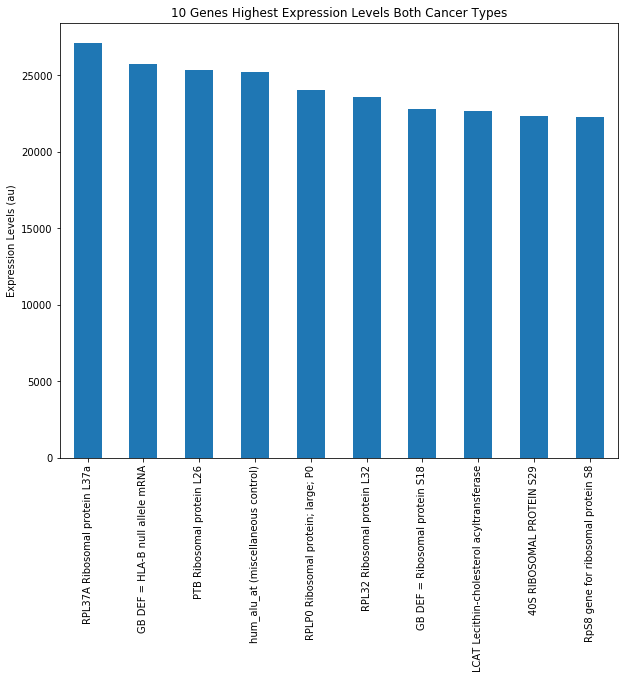

In [7]:
highest = combined.mean().abs().sort_values(ascending = False)
plt.figure(figsize=(10, 8))
highest.head(10).plot(kind = 'bar')
plt.title('10 Genes Highest Expression Levels Both Cancer Types')
plt.ylabel('Expression Levels (au)')

Text(0,0.5,'Expression Levels (au)')

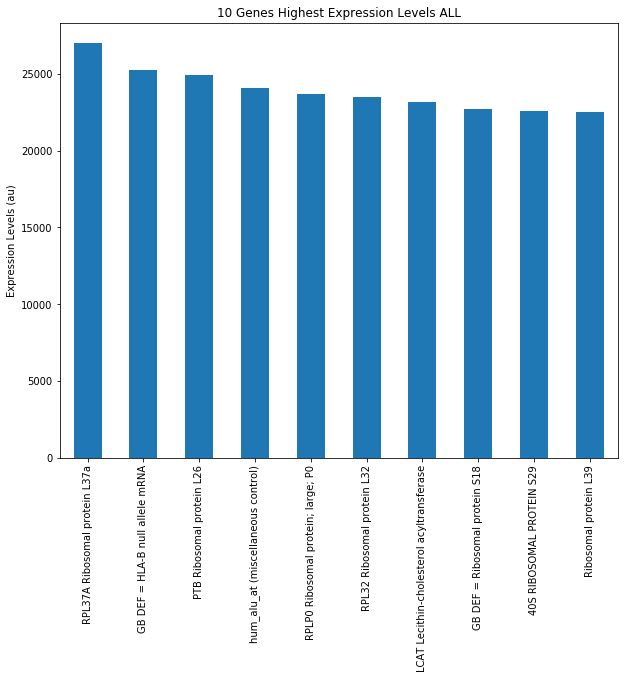

In [8]:
c_ALL = combined[combined.cancer == 'ALL']
highest_ALL = c_ALL.mean().abs().sort_values(ascending = False)
plt.figure(figsize=(10, 8))
highest_ALL.head(10).plot(kind = 'bar')
plt.title('10 Genes Highest Expression Levels ALL')
plt.ylabel('Expression Levels (au)')

Text(0,0.5,'Expression Levels (au)')

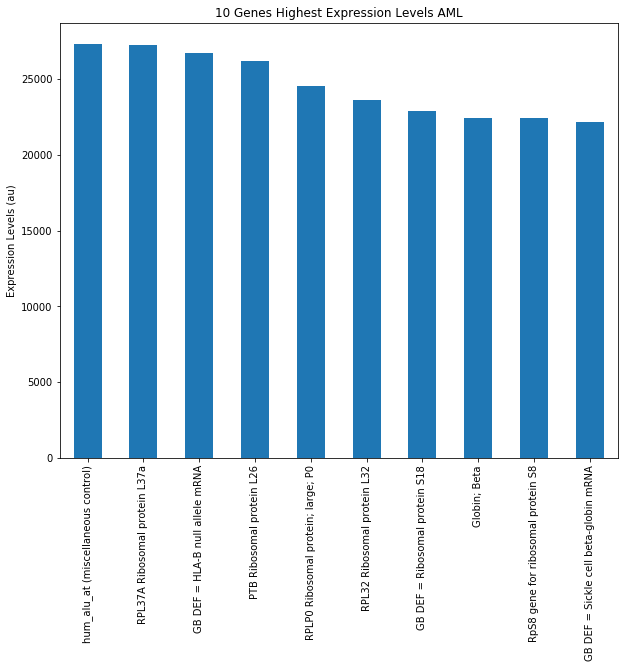

In [9]:
c_AML = combined[combined.cancer == 'AML']
highest_AML = c_AML.mean().abs().sort_values(ascending = False)
plt.figure(figsize=(10, 8))
highest_AML.head(10).plot(kind = 'bar')
plt.title('10 Genes Highest Expression Levels AML')
plt.ylabel('Expression Levels (au)')

## Model Creation / Data Preparation

In [10]:
train_no_acc = transposed_train.drop(["Gene Accession Number","Gene Description"]).apply(pd.to_numeric)
test_no_acc = transposed_test.drop(["Gene Accession Number", "Gene Description"]).apply(pd.to_numeric)
predictors_no_acc = predictors.drop(['Gene Accession Number'], axis = 1).apply(pd.to_numeric)

In [11]:
#resetting indices for test and train data frames
train_no_acc = train_no_acc.reset_index(drop = True)
test_no_acc = test_no_acc.reset_index(drop = True)

In [12]:
#creating data frames for both test and train data validation
validation_train = validation_df[validation_df.patient <= 38].reset_index(drop = True)
validation_test = validation_df[validation_df.patient > 38].reset_index(drop = True)
validation_test.head()

,patient,cancer
0,39,ALL
1,40,ALL
2,41,ALL
3,42,ALL
4,43,ALL


In [13]:
# combining predictor and validation set data
train = pd.concat([validation_train, train_no_acc], axis = 1)
test = pd.concat([validation_test, test_no_acc], axis = 1)

In [14]:
#creating sample data frames from original for model creation
train_sample = train.iloc[:,2:].sample(n=200, axis=1)
test_sample = test.iloc[:,2:].sample(n=200, axis=1)
test_sample.head()

,5761,6271,5185,2326,113,6379,1255,1095,5343,1379,...,97,3626,742,3367,4118,3262,1830,3297,3312,6400
0,-362,135,755,-7,-456,74,190,125,-292,678,...,226,164,72,86,0,-253,84,-89,301,3041
1,-866,102,349,11,1026,-17,49,344,-118,890,...,632,204,187,152,143,-237,156,-62,203,849
2,0,381,392,92,157,11,89,399,-110,1735,...,253,132,40,0,-410,-240,424,-188,161,2566
3,-266,77,243,67,254,500,226,367,-220,1328,...,250,21,-14,98,-109,163,218,-172,195,1260
4,-175,78,344,-43,414,308,185,632,-73,2023,...,402,133,161,34,431,-230,436,-136,229,401


In order to test whether the data should be scaled before further model creation it's distribution was analyzed using a histogram as well as a Kernel Density Estimation. The results of this analysis showed that although a large portion of the data was indeed centered at zero it was still right skewed. In order to ramify this a scaled version of the data was used for analysis. 

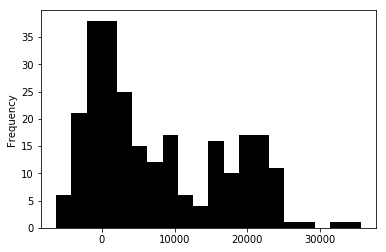

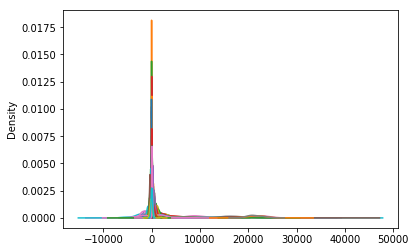

In [15]:
train_sample.plot(kind="hist", legend=None, bins=20, color='k')
train_sample.plot(kind="kde", legend=None);

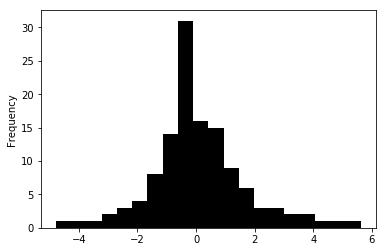

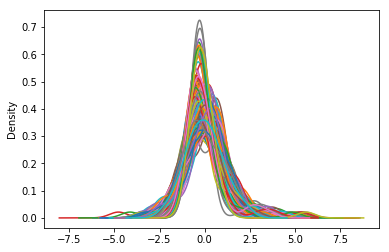

In [16]:
from sklearn import preprocessing
scaled = pd.DataFrame(preprocessing.scale(train_sample))
scaled.plot(kind="hist", legend=None, bins=20, color='k')
scaled.plot(kind="kde", legend=None);

### PCA

In order to test the potential value of PCA as a potential dimensionality reduction method before analysis it was performed on a sample and the cummulative variance was compared to different numbers of principle components. What is observed is that within 30 principle components over 90% of the data's variance is captured. This indicates that PCA will be effective in reducing the effects of the data's large feature number and creating a more accurate model.

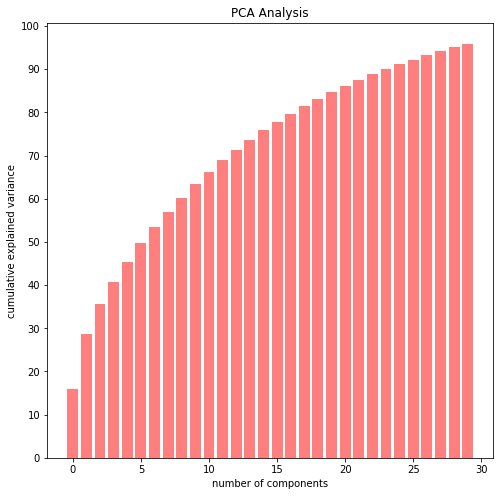

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sample_scaled = StandardScaler().fit_transform(train_sample)
pca = PCA(n_components = 30)
pca.fit(sample_scaled)

cum_sum = pca.explained_variance_ratio_.cumsum()
cum_sum = cum_sum*100

fix, ax = plt.subplots(figsize = (8, 8))
plt.bar(range(30), cum_sum, color = 'r',alpha=0.5)
plt.title('PCA Analysis')
plt.ylabel('cumulative explained variance')
plt.xlabel('number of components')
plt.locator_params(axis='y', nbins=20)


In [18]:
#training and test samples are created and scaled for model creation
X_train = StandardScaler().fit_transform(train_no_acc)
X_test = StandardScaler().fit_transform(test_no_acc)
y_train = validation_train['cancer']
y_test = validation_test['cancer']

### Pairing PCA with Logistic Regression

Below I've paired PCA with logistic regression in order to create a regression model using a sample with reduced dimensionality. From the results we see that the ideal number of components is less than 10. Below the accuracy of the regression is plotted compared to the number of components.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


def pipeline_PCA_GLM(components):
    accuracy_chart = []
    for i in components:
        steps = [('pca', PCA(n_components = i)),
        ('estimator', LogisticRegression())]
        pipe = Pipeline(steps)
        pipe.fit(X_train, y_train)
        predictions = pipe.predict(X_test)
        accuracy_chart.append(accuracy_score(y_test,predictions))
    return accuracy_chart


In [20]:
n_components = range(1,30)
accuracy_chart = pipeline_PCA_GLM(n_components)

Text(0.5,0,'Number of Components')

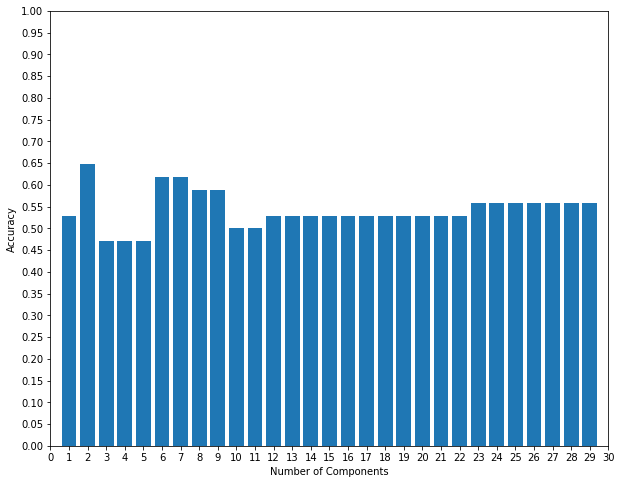

In [21]:
plt.figure(figsize=(10, 8))
plt.bar(n_components, accuracy_chart)
plt.ylim(0,1)
plt.xlim(0,30)
plt.locator_params(axis='y', nbins=20)
plt.locator_params(axis = 'x', nbins = 30)
plt.ylabel("Accuracy")
plt.xlabel("Number of Components")

### K-Nearest Neighbors

In order to see if the data was organized in separate gaussian distributions the data was clustered using K-Nearest Neighbors. The results of this clustering was used to create a model that was fit to the test set. We can see that the ideal number of neighbors is less than 10 and seems to lay at roughly 2.

In [22]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
def knn_pred(train_predictors, train_outcome, k_range, test_predictors):
    #train_predictors and train_outcome should both be from training split while test_predictors should be from test split
    y_pred = []
    for i in k_range:
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(train_predictors, train_outcome)
        y_pred.append(knn.predict(test_predictors))
    return y_pred




In [23]:
#function compares KNN accuracy at different levels of K
def knn_accuracy(pred, k_range, test_outcome):
    #pred represents predicted values while test_outcome represents the values from the test set
    accuracy_chart = []
    for i in range(len(k_range)):
        accuracy_chart.append((sklearn.metrics.accuracy_score(test_outcome, pred[i])))
    return accuracy_chart
        

Text(0.5,0,'Number of Neighborhoods')

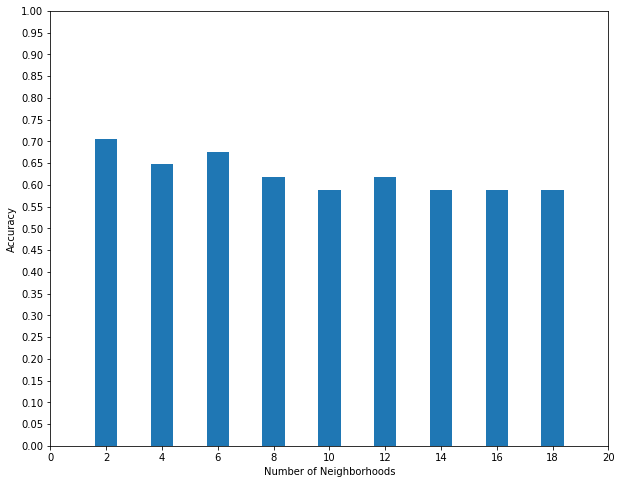

In [24]:
train_range = range(2, 20, 2)
sample_pred = knn_pred(X_train, y_train, train_range, X_test)
accuracy = knn_accuracy(sample_pred, train_range, y_test)
plt.figure(figsize=(10, 8))
plt.bar(train_range, accuracy)
plt.ylim(0,1)
plt.xlim(0,20)
plt.locator_params(axis='y', nbins=20)
plt.locator_params(axis = 'x', nbins = 10)
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighborhoods")

### Conclusion

The analysis of this DNA microarray data has shown some interesting results and seems relatively amenable to model creation. During PCA it was shown that the model achieves the highest accuracy when the number of components is two. If one were to research the roles and mechanisms of the main genes involved then it would be possible to find insight into the main factors leading to the two different cancer types as well as what proteins are generally linked to leukemia. The models created achieved accuracy levels within roughly 5% of those observed in the study from which the data was derived. Although modelling wasn't the main goal of this analysis these results indicate that the algorithms used could lead to a high degree of accuracy if fine tuned.